# Elden Ring Boss EDA
The objective of this project is to simply do some basic Exploratory Data Analysis of Elden Ring. ELDEN RING is a new fantasy world created by Hidetaka Miyazaki and George R. R. Martin. Players will unravel the mysteries of its power while encountering diverse adversaries, characters with unique motivations, and fearsome creatures. The game offers vast landscapes and complex dungeons to explore seamlessly, either on foot or horseback, alone or with other players. It introduces refined action-RPG gameplay where players can create their own character, experiment with weapons and magical abilities, and choose different approaches to exploration and combat.

  ## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import numpy as np

# Bosses
They are the staple of FromSoftware's RPG games, including Elden Ring. These bosses are formidable adversaries with unique designs, abilities, and backstories. Each boss presents a significant challenge that requires careful observation, strategic thinking, and precise execution to overcome. From towering creatures to agile warriors, the bosses in "Elden Ring" offer thrilling and intense battles that test the player's skills and resolve. Defeating these bosses rewards players with valuable loot, progression, and a sense of accomplishment.

We shall start by looking at the different regions in the game and how many bosses there are in each region.

## Display the boss data

In [ ]:
bosses = pd.read_csv('bosses.csv')
bosses

,id,name,image,region,description,location,drops,healthPoints
0,17f695abef9l0i1ujzrup5y0z7rw6,Abductor Virgins,NaN,Mount Gelmir,Deadly mechanical constructs who wield massive...,Volcano Manor,"['10.000 Runes', ""Inquisitor's Girandole""]",???
1,17f69b4ba0al0i1uk6s98t1nbtxunt,"Alecto, Black Knife Ringleader",https://eldenring.fanapis.com/images/bosses/17...,Liurnia of the Lakes,Remarkably agile and aggressive warrior. Dange...,"Ringleader's Evergoal, Liurnia of the Lakes","['8.000 Runes', 'Black Knife Tiche']",???
2,17f69d0313fl0i1uk8pokynv71bkz8,Alecto Black Knife Ringleader,https://eldenring.fanapis.com/images/bosses/17...,Liurnia of the Lakes,Remarkably agile and aggressive warrior. Dange...,Limgrave,"['80.000 Runes', 'Other Drops']",???
3,17f69b85929l0i1ukc4l2up7yp9v0i,Alabaster Lord,https://eldenring.fanapis.com/images/bosses/17...,Liurnia of the Lakes,An Evergaol prisoner wielding a vicious sword ...,"Royal Grave Evergaol, Liurnia of the Lakes","['3.600 Runes', 'Meteorite']",???
4,17f69a3ca37l0i1ukd1lq14ctafbk,"Adan, Thief Of Fire",https://eldenring.fanapis.com/images/bosses/17...,Liurnia of the Lakes,"An evergaol prisoner and former battle mage, A...",Malefactor's Evergaol,"['3.800 Runes', 'Flame of the Fell God']",2200
...,...,...,...,...,...,...,...,...
101,17f6968dcfal0i1v1y8dnaop27j5qg,Tibia Mariner,https://eldenring.fanapis.com/images/bosses/17...,Liurnia of the Lakes,Tibia Mariner is a spectral sailor capable of ...,"Summonwater Village, Liurnia of The Lakes, Wyn...","['2400 Runes', 'Deathroot', 'Skeletal Militiam...",≈2750
102,17f69621aadl0i1v2f5fkvee5z6719,Ulcerated Tree Spirit,https://eldenring.fanapis.com/images/bosses/17...,Mount Gelmir,A corrupted and deformed tree that lurks in Mt...,Mt. Gelmir,"['18,000 Runes', 'Leaden Hardtear', 'Cerulean ...","≈17,428"
103,17f697500cal0i1v2hh14qewvbrwrn,Valiant Gargoyle,https://eldenring.fanapis.com/images/bosses/17...,Limgrave,"Just like the wielder, the missing parts have ...",Siofra Aqueduct,"['30000 Runes', '32000 Runes', ""Gargoyle's Gre...","≈9,120"
104,17f696a35c3l0i1v2k2s30hlu2y50j,Wormface,https://eldenring.fanapis.com/images/bosses/17...,Altus Plateau,A ghastly blood rotted tree with the face of a...,Minor Erdtree (Altus Plateau),"['10000 Runes', 'Crimsonspill Crystal Tear', '...",???


## Exploratory Data Analysis

### Checking for missing values

In [ ]:
print(bosses.isnull().sum())

id              0
name            0
image           6
region          0
description     1
location        0
drops           0
healthPoints    1
dtype: int64


There are missing values in description, image and healthPoints. We do not really care about missing information in image and description column as it does not give us any analytical data. So we shall ignore those. We will however have to take care of the missing values in the healthPoints column, which is done further down.

### Summary

In [ ]:
# Summary statistics
print(bosses.describe())

                                   id             name  \
count                             106              106   
unique                            106              104   
top     17f695abef9l0i1ujzrup5y0z7rw6  Godskin Apostle   
freq                                1                2   

                                                    image         region  \
count                                                 100            106   
unique                                                 96             11   
top     https://eldenring.fanapis.com/images/bosses/17...  Altus Plateau   
freq                                                    2             24   

                                              description    location  \
count                                                 105         106   
unique                                                102          84   
top     The apostles, one said to serve Destined Death...  Mt. Gelmir   
freq                                

In [ ]:
# Displaying the regions in the game
bosses['region'].unique()

array(['Mount Gelmir', 'Liurnia of the Lakes', 'Altus Plateau',
       'Limgrave', 'Weeping Peninsula', 'Caelid', 'Consecrated Snowfield',
       'Dragonbarrow', 'Mountaintops of the Giants',
       'Mountaintop of the Giants', 'Liunia of the Lakes'], dtype=object)

In [ ]:
# Get the data type of each column
column_data_types = bosses.dtypes

# Display the data types
print(column_data_types)

id              object
name            object
image           object
region          object
description     object
location        object
drops           object
healthPoints    object
dtype: object


### Number of bosses in each region

In [ ]:
# Getting a count of bosses in each region
bosses_location = bosses.groupby('region').count()['name']
bosses_location

region
Altus Plateau                 24
Caelid                        12
Consecrated Snowfield          3
Dragonbarrow                   3
Limgrave                      23
Liunia of the Lakes            1
Liurnia of the Lakes          15
Mount Gelmir                  11
Mountaintop of the Giants      1
Mountaintops of the Giants     7
Weeping Peninsula              6
Name: name, dtype: int64

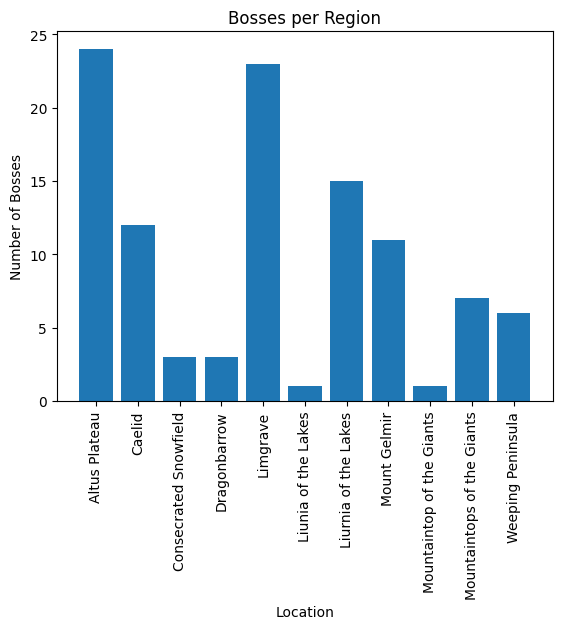

In [ ]:
# Plotting a graph for number of bosses in each region
plt.bar(bosses_location.index, bosses_location.values)
plt.xlabel('Location')
plt.ylabel('Number of Bosses')
plt.title('Bosses per Region')
plt.xticks(rotation=90)
plt.show()

Immedietely we see some discrepencies. Some locations are repeated? Well it's not that they are repeated, some locations have spelling mistakes in the dataset. Let us correct them and put them in their proper place. We can do this by looking at the correct spelling of these locations from the Elden Ring fextralife wiki page:

https://drive.google.com/file/d/17AysKnUwMcg50jS54IzdCFMGdr9AnH4F/view?usp=drive_link

https://drive.google.com/file/d/1j3rMQyhSZcATz1ToNsuujqe5MM5FfiQA/view?usp=drive_link

In [1]:
# Correcting the names in the region column
bosses.loc[bosses['region'] == 'Liunia of the Lakes', 'region'] = 'Liurnia of the Lakes'
bosses.loc[bosses['region'] == 'Mountaintop of the Giants', 'region'] = 'Mountaintops of the Giants'

# Plotting the graph for number of bosses per region again
bosses_location = bosses.groupby('region').count()['name']
plt.bar(bosses_location.index, bosses_location.values)
plt.xlabel('Location')
plt.ylabel('Number of Bosses')
plt.title('Bosses per Region')
plt.xticks(rotation=90)
plt.show()

NameError: ignored

### Average health of bosses in each region

#### Data Preprocessing for getting average health of bosses

In [ ]:
# Convert "???" to missing in the "healthPoints" column
bosses['healthPoints'] = bosses.healthPoints.replace(r'\?\?\?', np.NaN, regex=True)

# Remove all non-numeric characters
bosses['healthPoints'] = bosses['healthPoints'].apply(lambda x: re.sub('[^0-9]', '', str(x)))
bosses['healthPoints'] = pd.to_numeric(bosses['healthPoints'])

# Print the updated DataFrame
# pd.set_option('display.max_rows', None)
print(bosses['healthPoints'])
# pd.reset_option('max_rows')

0          NaN
1          NaN
2          NaN
3          NaN
4       2200.0
        ...   
101     2750.0
102    17428.0
103     9120.0
104        NaN
105     1954.0
Name: healthPoints, Length: 106, dtype: float64


In [ ]:
# Group the DataFrame by region and calculate the average health
average_health_df = bosses.groupby('region')['healthPoints'].mean()
average_health_df

region
Altus Plateau                  10651.000000
Caelid                         12234.000000
Consecrated Snowfield          17901.333333
Dragonbarrow                    6820.000000
Limgrave                        7865.388889
Liurnia of the Lakes            5061.000000
Mount Gelmir                  133766.125000
Mountaintops of the Giants     31488.714286
Weeping Peninsula               6224.000000
Name: healthPoints, dtype: float64

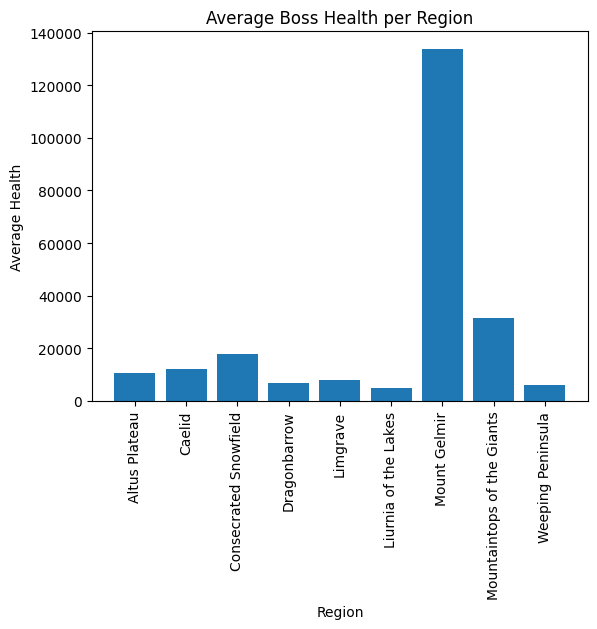

In [ ]:
# Plot the graph for average health of bosses in each region
# Plotting the bar graph
plt.bar(average_health_df.index, average_health_df.values)

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Average Health')
plt.title('Average Boss Health per Region')

# Rotating the x-axis labels if needed
plt.xticks(rotation=90)

# Display the graph
plt.show()

Well that looks a little weird. One region has a very high average boss health. Maybe there is an error in the dataset. We shall take a look at which boss has the max health in Mt. Gelmir and cross check with Elden Ring's fextralife wiki to see if our data is correct.

In [ ]:
# Filter the DataFrame for the region of Mount Gelmir
mount_gelmir_df = bosses[bosses['region'] == 'Mount Gelmir']

# Find the boss with the highest health in Mount Gelmir
boss_with_highest_health = mount_gelmir_df.loc[mount_gelmir_df['healthPoints'].idxmax()]

# Create a new DataFrame with the boss information
highest_health_boss_df = pd.DataFrame({
    'Name': [boss_with_highest_health['name']],
    'Region': [boss_with_highest_health['region']],
    'HealthPoints': [boss_with_highest_health['healthPoints']]
})

# Display the DataFrame
print(highest_health_boss_df)

                        Name        Region  HealthPoints
0  Rykard, Lord Of Blasphemy  Mount Gelmir     1000000.0


Let us check the Elden Ring fextralife wiki for Rykard's details.

https://drive.google.com/file/d/1J7yZfZc0lS8yDaS1TXclerwXfCdN2Gjz/view?usp=drive_link

As explained by the wiki, Rykard is a 2 phase boss fight. Each phase has it's own pool of health points, exclusive of each other. Therefore, the total health of the boss would be a sum of healthpoints of both phases. Let us see, what the healpoints of Rykard's two phases are

https://drive.google.com/file/d/1A4qvlBfL0nyHlMPSIRRX3zMJWtk94VGG/view?usp=drive_link

Phase 1: Serpent has 30,493 healthpoints
Phase 2: Rykard true form has 59,174 healthpoints

Total health = 30,493 + 59,174 = 89,667.

This number is not the same as the number in our dataset, which was 100,000 healthpoints, but it is pretty close. The reasoning could be that the healthpoints were changed in a balance patch after the dataset was recorded.

While I could not find any solid data to back my theory, we can use a few reddit threads to support our explanation. One such thread being:

https://drive.google.com/file/d/1_ShAMwU7kwszUgZ_LSzz0oM61sfEdELE/view?usp=drive_link

We can infer from the above, that Rykard was indeed rather strong at release and was later nerfed. This supports our theory that 100,000 could be the right value and hence we do not need to make any changes to the data.

### Boss with highest healthpoints
Now that we have seen what a beast Rykard is, let us see who has the highest amount of healthpoints in the entire game

In [ ]:
# Find the boss with the highest health points
boss_with_highest_health = bosses.loc[bosses['healthPoints'].idxmax()]

# Create a new DataFrame with the boss information
highest_health_boss_df = pd.DataFrame({
    'Name': [boss_with_highest_health['name']],
    'Region': [boss_with_highest_health['region']],
    'HealthPoints': [boss_with_highest_health['healthPoints']]
})

# Display the DataFrame
print(highest_health_boss_df)

                        Name        Region  HealthPoints
0  Rykard, Lord Of Blasphemy  Mount Gelmir     1000000.0


Look who it issssssss! He shall devour the very Goddsssssssssss haha!

Jokes aside, the reason for this abnormally high health is because he is an optional "gimmick" boss. Gimmick bosses in FromSoftware's Souls series (Elden Ring included, as it belongs in the same genre and borrows heavily from their Dark Souls series.) are usually bosses with an abnormally high amount of health. This is balanced with a "gameplay" gimmick, such as a special weapon or weakpoint that does insane damage or some other method. Such bosses usually need the player to discover the gimmick and beat the boss, or do it the harder way by wittling down their health little by little.

In Rykard's case, we have a special weapon that can found at the entrance of the boss room to make the fight a lot easier, as it does a very high damage to Rykard. This is explained by the wiki (second point):

https://drive.google.com/file/d/1etPtdss7pJjr7vTBLgwp2esUTyz578az/view?usp=drive_link

### Boss with second highest healthpoints.

In [ ]:
# Sort the DataFrame by healthPoints in descending order
sorted_df = bosses.sort_values('healthPoints', ascending=False)

# Get the boss with the second-highest health points
second_highest_health_boss = sorted_df.iloc[1]

# Create a new DataFrame with the boss information
second_highest_health_boss_df = pd.DataFrame({
    'Name': [second_highest_health_boss['name']],
    'Region': [second_highest_health_boss['region']],
    'HealthPoints': [second_highest_health_boss['healthPoints']]
})

# Display the DataFrame
print(second_highest_health_boss_df)

         Name                      Region  HealthPoints
0  Fire Giant  Mountaintops of the Giants      126720.0


Although considered to not be the most challenging bosses, it is definitely one of the harder bosses. The Fire Giant is also not optional, make it one of the biggest barriers in the story progression for most players. This is supported by the comment thread on the wiki page for this boss:

https://drive.google.com/file/d/1zLWv5XACU5H8o-Zu0dDhfelw4eBRJL0H/view?usp=drive_link

### Toughest Boss in the game (optional and subjective)

In [ ]:
# Filter the DataFrame for bosses with names containing "malenia"
filtered_df_malenia = bosses[bosses['name'].str.contains('malenia', case=False)]

# Create a new DataFrame with the relevant information
filtered_df_malenia = filtered_df_malenia[['healthPoints', 'region', 'name']]

# Display the DataFrame
print(filtered_df_malenia)

    healthPoints                 region                        name
71       26128.0  Consecrated Snowfield  Malenia, Blade Of Miquella


## Conclusions
1. The dataset analysis revealed missing data in three columns: image, description, and healthpoints. Among these, healthpoints was particularly crucial as it contained valuable analytical information.

2. Upon reviewing the dataset summary, we observed that the top value in the healthpoints column was marked as '???', indicating non-numeric values. It is essential to address this issue as we desire only numeric values in the healthpoints column.

3. The examination of column data types revealed that healthpoints was classified as an object type. To facilitate further statistical analysis of boss healthpoints, it is necessary to convert it to numeric values.

4. The evaluation of the number of bosses in each region exposed some spelling mistakes, resulting in duplicated regions. We corrected these errors using a quick Google search and re-displayed the graph, obtaining a more accurate representation of boss frequency in each region.

5. Calculating the average health of bosses in each region provided insights into the game's most challenging regions. Notably, Mt. Gelmir and Mountaintops of the Giants and Consecrated Snowfield stood out as regions with particularly high average boss health.

6. The unusually high average boss health in Mt. Gelmir prompted further investigation. We discovered that Rykard, a gimmick boss residing in Mt. Gelmir, contributed to the elevated average health.

7. Identifying the boss with the second-highest health, Fire Giant, confirmed its reputation for being a challenging mandatory boss. The wiki comment thread on the Fire Giant supported this claim. This suggests a correlation between boss healthpoints and the difficulty level of a region.

8. In line with this correlation, the presence of the boss Malenia in the Consecrated Snowfield, which boasted the third-highest average boss health, further reinforced the notion that the region is challenging.

9. While the relationship between boss healthpoints and the difficulty of an area may not be strictly linear, the average healthpoints of bosses in a region can serve as a reliable indicator of its difficulty level.

10. Elden Ring offers an enjoyable experience due to its intricate boss designs, mechanics, and a "fair but unforgiving" challenge aspect of the game.

